In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score

In [2]:
# Load data
insurance_data = pd.read_csv('medical_insurance.csv')

# Explore the data

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# Analyze the data

<Axes: title={'center': 'Correlation between smoking and insurance cost'}, xlabel='smoker', ylabel='charges'>

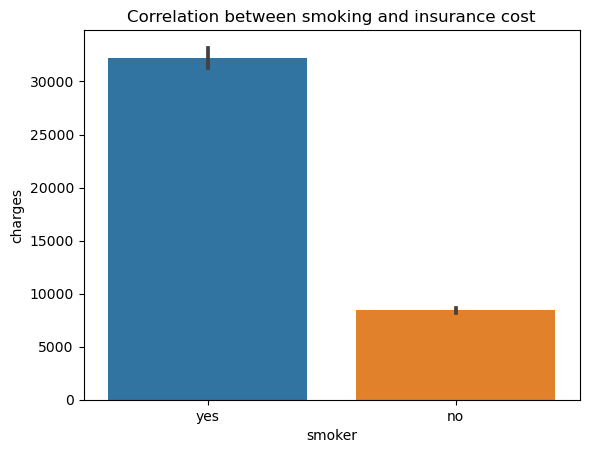

In [7]:
plt.figure()
plt.title('Correlation between smoking and insurance cost')
sns.barplot(data=insurance_data, x='smoker', y='charges')

<Axes: xlabel='sex', ylabel='charges'>

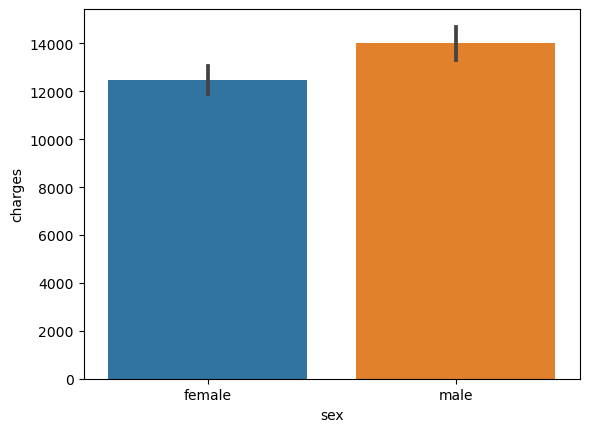

In [8]:
plt.figure()
sns.barplot(data=insurance_data, x='sex', y='charges')

<Axes: xlabel='charges', ylabel='age'>

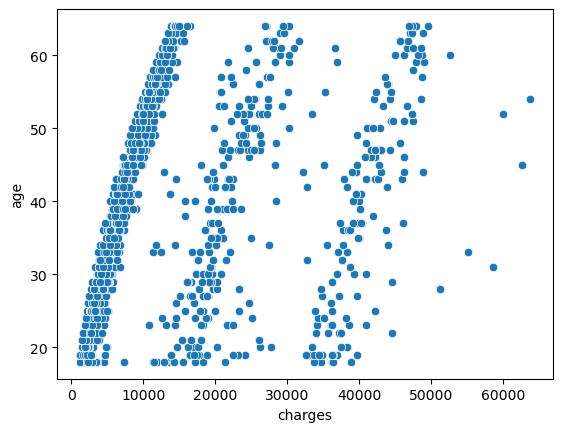

In [9]:
plt.figure()
sns.scatterplot(data=insurance_data.sort_values('age'), x='charges', y='age')

<Axes: xlabel='charges', ylabel='region'>

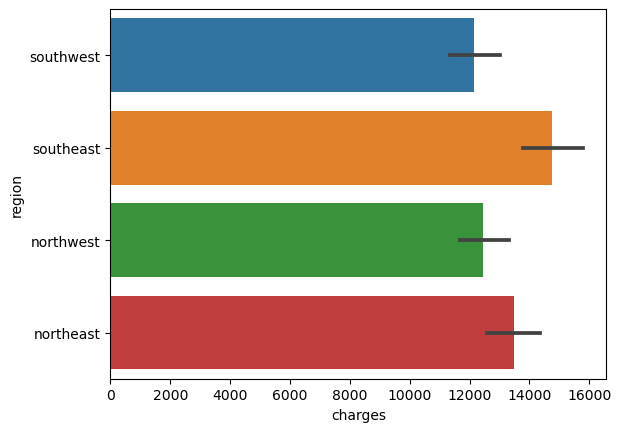

In [10]:
plt.figure()
sns.barplot(data=insurance_data, x='charges', y='region')

# Split data and encode values

In [11]:
X = insurance_data.drop(['charges'], axis=1)
y = insurance_data['charges']

encoder = OrdinalEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X))
X_encoded.columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.8, test_size=0.2, random_state=1)

# Train model using different alghorithms and evaluate them

In [12]:
def get_score(X_train, X_test, y_train, y_test, RegressionAlgo):
    model = RegressionAlgo()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Score is {r2_score(y_test, preds)}')

In [14]:
get_score(X_train, X_test, y_train, y_test, KNR)
get_score(X_train, X_test, y_train, y_test, RFR)
get_score(X_train, X_test, y_train, y_test, LR)

Score is 0.056208253829048815


Score is 0.9241054785902728
Score is 0.6812032853387171
